# Proyek Klasifikasi Gambar: Fashion MNIST
- **Nama:** Nimas Ristiya Rahma
- **Email:** nimasristiya@gmail.com
- **ID Dicoding:** nimasristiya

Sumber Dataset
https://www.kaggle.com/datasets/zalando-research/fashionmnist

## Import Semua Packages/Library yang Digunakan

In [23]:
import zipfile
import os
import shutil
import tensorflow as tf
import tensorflowjs as tfjs
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import img_to_array, load_img
from tensorflow.keras.preprocessing import image
from os import getcwd
import pathlib
import numpy as np
import tensorflow_datasets as tfds
from tensorflow.keras import regularizers

In [24]:
# Cetak versi TensorFlow yang sedang digunakan
print(tf.__version__)

2.18.0


## Data Preparation

### Data Loading

In [26]:
filePath = f"{getcwd()}/../tmp2/"

(train_examples, validation_examples), info = tfds.load('fashion_mnist',
                                                        data_dir=filePath,
                                                        with_info=True,
                                                        as_supervised=True,
                                                        split=['train[:80%]',
                                                                'train[80%:]'])

num_examples = info.splits['train'].num_examples
num_classes = info.features['label'].num_classes

In [27]:
print(f'Total data: {len(train_examples) + len(validation_examples)}')
print(f'Jumlah data training: {len(train_examples)}')
print(f'Jumlah data validation: {len(validation_examples)}')

Total data: 60000
Jumlah data training: 48000
Jumlah data validation: 12000


In [28]:
class_names = ['T-shirt_top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [29]:
# Create a labels.txt file with the class names
with open('labels.txt', 'w') as f:
    f.write('\n'.join(class_names))

In [30]:
# The images in the dataset are 28 by 28 pixels.
IMG_SIZE = 28

### Data Preprocessing

#### Preprocess Data

In [31]:
def format_example(image, label):
    image = tf.cast(image, dtype=tf.float32)
    image = image/255.0 # Normalize the image in the range [0, 1]

    return image, label

In [32]:
# Specify the batch size
BATCH_SIZE = 256

In [33]:
# Create Datasets
train_batches = train_examples.cache().shuffle(num_examples//4).batch(BATCH_SIZE).map(format_example).prefetch(1)
validation_batches = validation_examples.cache().batch(BATCH_SIZE).map(format_example)

## Modelling

In [34]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, input_shape=(28, 28, 1), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')])

model.compile(optimizer='RMSprop',
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3872)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         247,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 253,322 (989.54 KB)

 Trainable params: 253,322 (989.54 KB)

 Non-trainable params: 0 (0.00 B)

#### Train the model

In [35]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') > 0.9 and epoch >= 10):
      print("\nAkurasi melewati 90%, hentikan proses training!")
      self.model.stop_training = True

callbacks = myCallback()

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

history = model.fit(
    train_batches,
    epochs = 20,
    validation_data = validation_batches,
    verbose =2,
    callbacks=[callbacks]
)

Epoch 1/20
188/188 - 30s - 161ms/step - accuracy: 0.7557 - loss: 0.6698 - val_accuracy: 0.8287 - val_loss: 0.4491
Epoch 2/20
188/188 - 32s - 169ms/step - accuracy: 0.8521 - loss: 0.4121 - val_accuracy: 0.8650 - val_loss: 0.3628
Epoch 3/20
188/188 - 22s - 118ms/step - accuracy: 0.8723 - loss: 0.3525 - val_accuracy: 0.8813 - val_loss: 0.3242
Epoch 4/20
188/188 - 42s - 223ms/step - accuracy: 0.8863 - loss: 0.3142 - val_accuracy: 0.8861 - val_loss: 0.3069
Epoch 5/20
188/188 - 40s - 213ms/step - accuracy: 0.8968 - loss: 0.2848 - val_accuracy: 0.8913 - val_loss: 0.3067
Epoch 6/20
188/188 - 39s - 206ms/step - accuracy: 0.9035 - loss: 0.2645 - val_accuracy: 0.8892 - val_loss: 0.2996
Epoch 7/20
188/188 - 23s - 120ms/step - accuracy: 0.9091 - loss: 0.2457 - val_accuracy: 0.9032 - val_loss: 0.2693
Epoch 8/20
188/188 - 41s - 219ms/step - accuracy: 0.9159 - loss: 0.2293 - val_accuracy: 0.9047 - val_loss: 0.2614
Epoch 9/20
188/188 - 41s - 217ms/step - accuracy: 0.9205 - loss: 0.2159 - val_accuracy: 

## Evaluasi dan Visualisasi

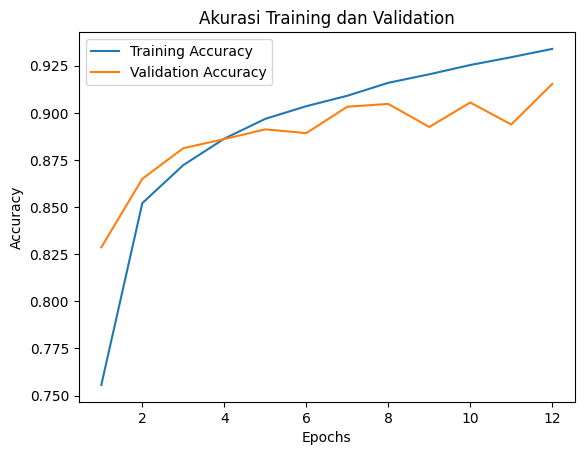

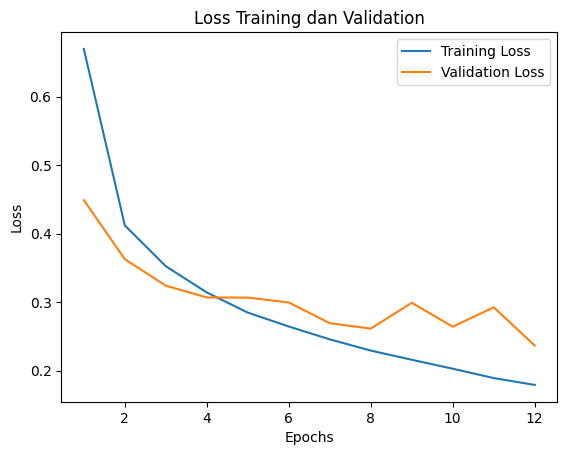

In [37]:
# Dapatkan nilai akurasi dan loss dari objek History
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot grafik akurasi
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Akurasi Training dan Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print("")

# Plot grafik loss
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Loss Training dan Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Konversi Model

In [38]:
# Simpan model dalam format SavedModel
export_dir = 'saved_model'
tf.saved_model.save(model, export_dir)
print(f"Model SavedModel disimpan di: {export_dir}")

Model SavedModel disimpan di: saved_model


In [39]:
# Simpan model dalam format TensorFlow.js
tfjs_model_dir = 'tfjs_model'
if not os.path.exists(tfjs_model_dir):
    os.makedirs(tfjs_model_dir)
tfjs.converters.save_keras_model(model, tfjs_model_dir)
print(f"Model TFJS disimpan di: {tfjs_model_dir}")

failed to lookup keras version from the file,
    this is likely a weight only file
Model TFJS disimpan di: tfjs_model


In [40]:
# Konversi dan simpan model dalam format TensorFlow Lite
tflite_model_dir = 'tflite'
if not os.path.exists(tflite_model_dir):
    os.makedirs(tflite_model_dir)

In [44]:
# Select mode of optimization
mode = "Speed"

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
else:
    optimization = tf.lite.Optimize.DEFAULT

converter.optimizations = [optimization]

In [45]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

# Invoke the converter to finally generate the TFLite model
tflite_model = converter.convert()

In [46]:
# Simpan model TFLite
tflite_model_file = pathlib.Path(f'{tflite_model_dir}/model.tflite')
tflite_model_file.write_bytes(tflite_model)
print(f"Model TFLite disimpan di: {tflite_model_file}")

Model TFLite disimpan di: tflite/model.tflite
